<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#有名な話" data-toc-modified-id="有名な話-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>有名な話</a></span></li><li><span><a href="#実装後の感想" data-toc-modified-id="実装後の感想-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>実装後の感想</a></span></li></ul></div>

# 有名な話
3層（以上）の細胞層を持つ多層パーセプトロンは隠れ層の細胞が十分おおきな数だけあり，かつ隠れ層の活性化関数が非線形関数であれば任意の関数を近似することが出来る万能近似器です．<br>
https://qiita.com/Ugo-Nama/items/04814a13c9ea84978a4c

# 実装後の感想
* データは[0,1]が暗黙の了解っぽい。負の値も条件によっては出力できるが、[0,1]区間のサンプルの近似精度が高い気がする。-> これは損失関数と活性化関数の組み合わせがカテゴリー分類用だから
* activationが負の値を出せないと、当然、負の値は出力できない
* 回帰の場合は損失関数はMSEで、出力層の活性化関数はlinearが普通。ノード数を少し多くする必要はあるが、ちゃんと収束する。
* 初期値に確かに依存する。normal は駄目でもhe_normalは良かったりする
* reluは層数が少ないと出力がガクガクするが、多層にすると滑らかになる



In [1]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt
import pickle
# %matplotlib inline

#from __future__ import division
#from IPython.core.debugger import Pdb; Pdb().set_trace() #  break したい所にこの行を張り付ける
# %pdb # 実行しておくとエラーが起きたところでデバッガが起動する

In [2]:
#import theano
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Input, UpSampling2D
from keras.optimizers import Adam
from keras.utils import np_utils
#from keras.datasets import mnist
from keras import backend as K
from keras.callbacks import TensorBoard
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


Using TensorFlow backend.


In [3]:
# %qtconsole

In [4]:
def func(x):
    return (x-1)*(x-0.5)*(x+0.5)*(x+1)*x

In [5]:
def evalplot( x_test, y_test, y_pred ):
    plt.clf()
    plt.scatter( x_test, y_test, s=2 )
    plt.scatter( x_test, y_pred, s=2 )
#    plt.draw()
    plt.pause(.01)

In [6]:
# データ作成
n_train = 100000
x_train_data = np.random.rand( n_train, 1 )*2-1
y_train_data = func( x_train_data )

scl_x = MinMaxScaler()
scl_y = MinMaxScaler()
#scl_x = StandardScaler()
#scl_y = StandardScaler()

x_train = scl_x.fit_transform(x_train_data)
y_train = scl_y.fit_transform(y_train_data)


x_test_data = np.arange( -1,1,0.01 ).reshape(-1,1)
x_test = scl_x.transform( x_test_data )
y_test = scl_y.transform( func( x_test_data ) )

In [7]:
# データ作成：タイプ２（リニア）
n_train = 100000
x_train = np.random.rand( n_train, 1 )*2-1
y_train = 1000 * func( x_train )

x_test = np.arange( -1,1,0.01 ).reshape(-1,1)
y_test = 1000 * func( x_test )

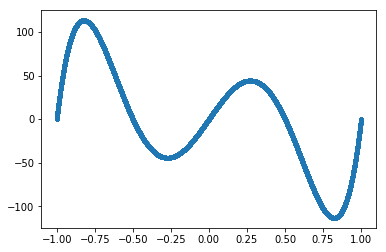

In [8]:
%matplotlib inline
#plt.hist(np.random.rand(10000,1))
plt.plot( x_train,y_train,'.')

In [9]:
# モデルの作成
model = Sequential()
act = 'sigmoid'
#act = 'relu'

init = 'glorot_normal'
#init = 'he_normal'

# モデルにレイヤーを積み上げていく
model.add(Dense(units=8, input_dim=1, activation=act, kernel_initializer=init))
model.add(Dense(units=8, input_dim=1, activation=act, kernel_initializer=init)) 
model.add(Dense(units=8, input_dim=1, activation=act, kernel_initializer=init))
model.add(Dense(units=1, activation='sigmoid')) # sigmoidは閾値が[0,1] なので負の値が表現できない

# 訓練プロセスの定義
#losstype = 'binary_crossentropy'
losstype = 'mse'

model.compile(loss=losstype,
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
# モデルの作成:タイプ２（リニア）
model = Sequential()
#act = 'sigmoid'
act = 'relu'

#init = 'glorot_normal'
init = 'he_normal'

# モデルにレイヤーを積み上げていく
model.add(Dense(units=8, input_dim=1, activation=act, kernel_initializer=init))
model.add(Dense(units=16, input_dim=1, activation=act, kernel_initializer=init)) 
model.add(Dense(units=32, input_dim=1, activation=act, kernel_initializer=init))
model.add(Dense(units=1, activation='linear')) # 回帰はこれらしい

# 訓練プロセスの定義
losstype = 'mse'

model.compile(loss=losstype,
              optimizer='adam',
              metrics=['accuracy'])

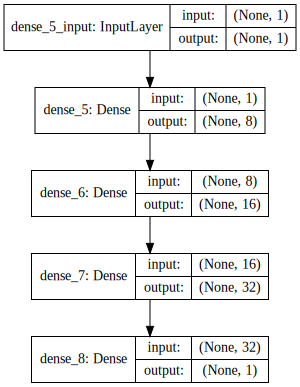

In [11]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True ).create(prog='dot', format='svg'))

In [12]:
%matplotlib
plt.ion()
fig = plt.figure(figsize=[4,4])
plt.show()

Using matplotlib backend: Qt5Agg


Epoch 1/5
100000/100000 [==============================] - 2s - loss: 840.8895 - acc: 0.0000e+00     
Epoch 2/5
100000/100000 [==============================] - 1s - loss: 339.0089 - acc: 0.0000e+00     
Epoch 3/5
100000/100000 [==============================] - 1s - loss: 258.5456 - acc: 0.0000e+00     
Epoch 4/5
100000/100000 [==============================] - 1s - loss: 152.8079 - acc: 0.0000e+00     
Epoch 5/5
100000/100000 [==============================] - 1s - loss: 121.0983 - acc: 0.0000e+00     
Epoch 1/5
100000/100000 [==============================] - 1s - loss: 93.6490 - acc: 0.0000e+00     
Epoch 2/5
100000/100000 [==============================] - 1s - loss: 55.8451 - acc: 0.0000e+00     
Epoch 3/5
100000/100000 [==============================] - 1s - loss: 25.9767 - acc: 0.0000e+00     
Epoch 4/5
100000/100000 [==============================] - 1s - loss: 12.2683 - acc: 0.0000e+00     
Epoch 5/5
100000/100000 [==============================] - 1s - loss: 6.6877 - acc: 0.

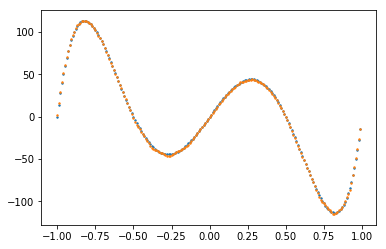

In [13]:
for _ in range(10):
    # 訓練の実行
    hist = model.fit(x_train, y_train, epochs=5, verbose=1,batch_size=32)
    # 予測の実行
    y_pred = model.predict(x_test)
    evalplot( x_test, y_test, y_pred)

In [ ]:
plt.plot( hist.history['loss'], '-o' )

In [14]:
%qtconsole